<a href="https://colab.research.google.com/github/ChenHsieh/COLAB_notebooks/blob/main/dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA LCMS
This program... does something...

To run... 


In [1]:
# import stuff
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# read in LCMS data
input_table = pd.read_csv("/content/Yen_LCMS6hr.csv", index_col=0)
input_table = input_table.fillna(0)
input_table


,95,96,97,98,99,101,102,103,104,105,106,107,108,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188
Sample#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C111,725681,452770,692367,976818,625603,842797,1062812,845093,1149160,353663,1074059,1028441,348401,442380,549979,509595,422655,756745,928418,445260,563749,753990,596753,206728,783740,510929,492403,445051,748958,526902,211715,293174,26279,446082,942572,732768,640485,618121,606841,655433,...,675411,854769,890289,846341,839575,932574,603836,740242,1069133,764966,629584,1023934,580501,703453,371818,883384,593475,776176,537339,963532,149523,232829,901862,752491,650572,712555,879257,872015,596861,629604,848230,729256,750426,511712,382773,782498,302981,993223,518010,445563
C294,3603479,4682862,5097519,4808024,4930957,4731987,3888351,4586141,3641756,4733084,4722884,4161033,3083957,5486723,4133789,5760582,5798953,5410387,3693256,4105380,5765682,4391605,5342328,2072057,3985607,5247937,4948730,4277804,4047967,4697015,5584650,3482299,634572,5062314,5281291,4454160,4079937,3642203,3613499,5132485,...,4337184,4862000,3270526,5019563,4743317,4051713,5445920,5081110,4748014,4050084,3677211,3550465,4213913,3931379,2391284,4919424,3657238,5375384,5440483,3915376,1419146,2824424,3524469,4154606,5885803,3850853,4197428,4417821,4083064,5206553,4268853,4550039,5098435,4745603,4372015,4671936,3404105,4700569,3440279,3034592
C152,1360245,1514583,1800010,1390280,1468746,1513829,1859119,1505495,1748480,1995343,1727217,1607077,1473826,1993910,1886475,2378550,2344128,1994356,1724338,2408989,2164577,1658522,2009187,668366,1379232,1920368,2265314,1663610,1333932,2061100,2142096,1535939,261581,2341170,1577473,1685678,2214009,1346923,1518734,1659004,...,1332307,2075545,1348838,1687922,2043963,1277733,2024186,1635950,1470511,1257837,1229657,1565466,1620528,1519563,1124491,1428985,1745015,2303784,1991511,1651573,365660,1115300,1628826,1653837,2256168,1802756,1385556,1329015,1568222,1612944,1430672,1861929,2290840,1613237,1754077,1939192,1492179,1681940,1670620,1837747
C55,587290,699279,608404,821722,1249151,753239,798186,1321707,706504,302353,1132584,511691,600026,786593,758769,839472,742212,866845,847942,574154,706382,985248,955778,325795,1063616,957615,929973,1056934,858135,1157457,959223,744483,76143,856868,1022233,738362,654490,1001936,1269353,917220,...,1062060,1021884,947664,874079,907342,1066835,490310,1021298,1162012,643554,894019,1038595,860860,877440,428828,1280775,803334,786545,985636,652983,180301,270253,952823,950698,806496,935403,977615,909378,564451,917289,986003,871877,926423,699846,379985,760648,233323,738643,370254,410232
C88,588237,1552706,1356014,827557,870409,1211849,1018835,744478,1021552,985950,642967,865549,718446,1388062,1483602,924045,1062177,803582,820548,1395694,1054016,868681,859222,329740,918208,800035,881296,772972,641703,1077805,1180720,1079697,99231,927045,514715,731584,1376103,780247,791082,775535,...,830879,899355,597439,716911,1216637,638783,933021,741858,782995,584593,487390,742401,1103508,735279,349421,660511,835678,1071341,1086097,963359,175505,753681,921435,911934,851465,672866,551130,472841,532289,733366,614528,730252,835384,552774,712353,657285,536604,839760,458410,504512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C330,11108000,10319651,8168558,15178588,17609600,12472680,14886289,13400752,16314734,3967204,17193427,14361150,4922332,8318572,8747316,6781528,8518102,11561314,12105317,6829786,10576403,12831119,11508883,2199224,16379423,938827

In [2]:
# read in sample information for ploting
sample_info_table = pd.read_csv("/content/Yen_LCMS6hr_sample_info.csv", index_col=0)
sample_info_table

,name,Genotypes,nrx1_mutant,Treatment,SA_level
Sample#,,,,,
95,095_WT-.d,WT,n,W,2
96,096_WT+.d,WT,n,PQ,2
97,097_WT-.d,WT,n,W,2
99,099_WT-.d,WT,n,W,2
100,100_WT+.d,WT,n,PQ,2
...,...,...,...,...,...
184,184_D6+.d,D6,y,PQ,4
185,185_D6+.d,D6,y,PQ,4
186,186_D6+.d,D6,y,PQ,4


In [3]:
# sample list checking, it will print out sample id that don't match

sample_size = len(list(input_table.columns))
for i in range(sample_size):
  
  if int(list(input_table.columns)[i]) == int(list(sample_info_table.index)[i]):
    continue  
  print(f"{list(input_table.columns)[i]} not = {list(sample_info_table.index)[i]}")

98 not = 99
99 not = 100


In [4]:
%%time

# PCA
from sklearn.preprocessing import StandardScaler
input_data = input_table.values.transpose()
x = StandardScaler().fit_transform(input_data)
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)

CPU times: user 34.9 ms, sys: 13.3 ms, total: 48.2 ms
Wall time: 128 ms


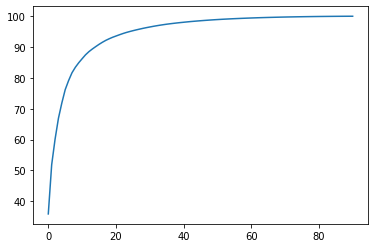

In [5]:
# explained_variance_ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_[:] * 100))

In [6]:
# prepare the Dataframe for ploting, by adding sample information
columns = [f'principal component {i+1}' for i in range(principalComponents.shape[1])]
principalDf = pd.DataFrame(data = principalComponents, columns = columns)
for info in sample_info_table.columns:
  principalDf[info] = list(sample_info_table[info])
  principalDf[info]


you can substitute the hue and style with these different info: ['name', 'Genotypes', 'nrx1_mutant', 'Treatment', 'SA_level']


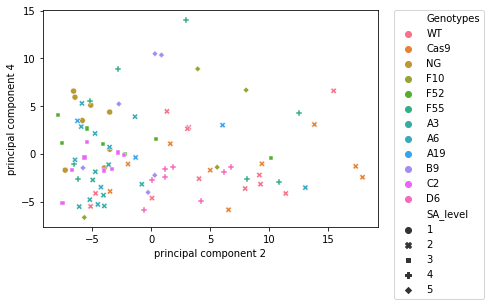

In [7]:
# visualize PCA result

# you might need to change the principal component you want plot by yourself
# as well as how are you gonna visualize them
print(f"you can substitute the hue and style with these different info: {list(sample_info_table.columns)}")
sns.scatterplot(
    data=principalDf,
    x='principal component 2',
    y='principal component 4',
    hue='Genotypes',
    style='SA_level'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [8]:
!pip install umap-learn

     |████████████████████████████████| 80 kB 4.0 MB/s 
     |████████████████████████████████| 1.1 MB 30.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=762d3f9d9688f86bb44ec56c9ac25ab1c9423751e9cebd579493061bf9417f37
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=da73ab2ef0cbb7b8a4299cb2ab1994912cbde71681ad6cdb0921553238867f1d
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent


In [9]:
%%time
# UMAP

# hays - here i got ModuleNotFoundError - need !pip install umap-learn (above)

import umap
reducer = umap.UMAP()
input_data = input_table.values.transpose()
scaled_input_data = StandardScaler().fit_transform(input_data)
embedding = reducer.fit_transform(scaled_input_data)
embedding.shape

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


CPU times: user 27.4 s, sys: 415 ms, total: 27.9 s
Wall time: 29 s


you can substitute the hue and style with these different info: ['name', 'Genotypes', 'nrx1_mutant', 'Treatment', 'SA_level']


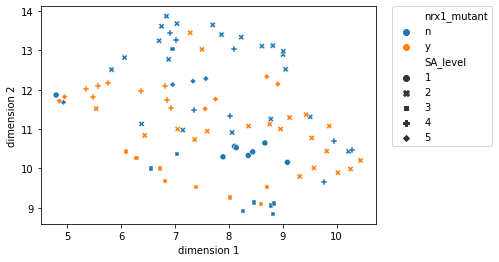

In [10]:
# visualize UMAP result
print(f"you can substitute the hue and style with these different info: {list(sample_info_table.columns)}")
# prepare the Dataframe for ploting, by adding sample information
columns = [f'dimension {i+1}' for i in range(embedding.shape[1])]
eb = pd.DataFrame(data = embedding, columns = columns)
for info in sample_info_table.columns:
  eb[info] = list(sample_info_table[info])
eb
sns.scatterplot(
    data=eb,
    x="dimension 1",
    y="dimension 2",
    hue='nrx1_mutant',
    style='SA_level'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)